<a href="https://colab.research.google.com/github/pushkarsri999/supervised_ml_regression_project/blob/main/pushkar_Ted_Talk_Views_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

##**"TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website."**

##***Attribute / Description /Data Type***

***talk_id Talk / identification
number provided by
TED / int***

***title / Title of the talk / string***

***speaker_1 / First speaker in TED's
speaker list / string***

***speakers / Speakers in the talk dictionary***

***occupations *Occupations of the
speakers / dictionary***

***about_speakers / *Blurb about each
speaker / dictionary***

***views(Dependent
Variable) / Count of views / int***

***recorded_date / Date the talk was
recorded / string*** 

***published_date / Date the talk was
published to TED.com / string***

***event / Event or medium in
which the talk was given / string***

***native_lang / Language the talk was
given in / string***

***available_lang / All available languages
(lang_code) for a talk / list***

***comments / Count of comments / int***

***duration / Duration in seconds / int***

***topics / Related tags or topics for the talk / list***

***related_talks / Related talks
(key='talk_id',
value='title') / dictionary***

***url / URL of the talk / string***

***description / Description of the talk / string***

***transcript / Full transcript of the talk / string***

****The dictionary key maps to the speaker in ‘speakers’.***

##**Importing Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set() 
import ast

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

In [ ]:
raw_data=pd.read_csv("/content/drive/MyDrive/Alma Better/Capstone Project Regression Model/Copy of data_ted_talks.csv")

# ***Lets first describe our data.*** 

In [ ]:
raw_data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
# checking for null values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
raw_data.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [ ]:
# Duplicate values check
print(raw_data.duplicated().sum())

0


In [ ]:
# null values removal
#data=raw_data.dropna()

In [ ]:
#data.isna().sum()

##***Now we can start our Exploratory Data Analysis***

In [ ]:
raw_data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Formating DateTime

In [ ]:
from datetime import datetime
import calendar
today=datetime.now()
today.strftime('%Y-%m-%d')

'2022-09-16'

The format of recorded_date and published_date are in string format, we have to convert them into date format

In [ ]:
# Recorded date formatting:
raw_data['recorded_date']= pd.to_datetime(raw_data['recorded_date'])
# Published date formatting:
raw_data['published_date']= pd.to_datetime(raw_data['published_date'])

In [ ]:
raw_data[['recorded_date','published_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   recorded_date   4004 non-null   datetime64[ns]
 1   published_date  4005 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 62.7 KB


In [ ]:
# Number of days Ted talk has been published
last_publishing_date= raw_data['published_date'].max()
raw_data['time_passed_since_published']= last_publishing_date - pd.DatetimeIndex(raw_data['published_date'])

In [ ]:
import datetime
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
raw_data['publish_month'] = pd.DatetimeIndex(raw_data['published_date']).month
raw_data['publish_month'] = raw_data['publish_month'].apply(lambda x: calendar.month_abbr[x])
raw_data['publish_year'] = pd.DatetimeIndex(raw_data['published_date']).year
raw_data['publish_day'] = pd.DatetimeIndex(raw_data['published_date']).day
raw_data['publish_week_day']= raw_data['published_date'].apply(lambda x: day_order[datetime.date(x.year, x.month, x.day).weekday()])

##***Creating variable for Daily Views***

In [ ]:
# Daily views/Talk:
raw_data['daily_views'] = raw_data['views'] / ( raw_data['time_passed_since_published'].apply(lambda x : x.days) + 1 )

In [ ]:
raw_data[['publish_month','publish_year','publish_day','publish_week_day','daily_views']]

,publish_month,publish_year,publish_day,publish_week_day,daily_views
0,Jun,2006,27,Tue,696.735614
1,Jun,2006,27,Tue,2867.645837
2,Jun,2006,27,Tue,379.836267
3,Jun,2006,27,Tue,526.808187
4,Jun,2006,27,Tue,12863.744117
...,...,...,...,...,...
4000,Apr,2020,27,Mon,125733.500000
4001,Apr,2020,27,Mon,76796.750000
4002,Apr,2020,28,Tue,154804.666667
4003,Apr,2020,30,Thu,56582.000000


### Continuous variables

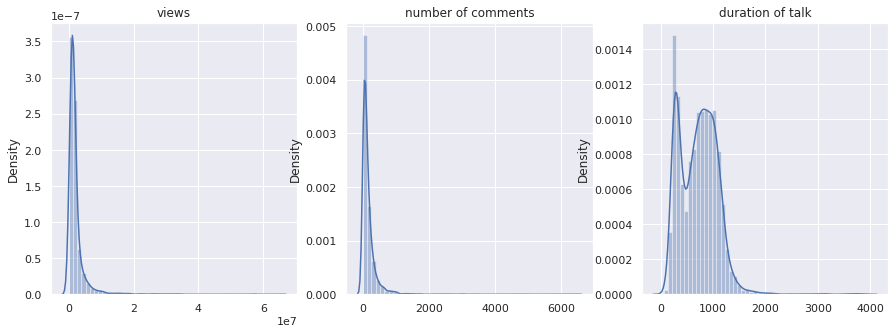

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("views")
sns.distplot(x= raw_data['views'])

plt.subplot(1,3,2)
plt.title("number of comments")
sns.distplot(x= raw_data['comments'])

plt.subplot(1,3,3)
plt.title("duration of talk")
sns.distplot(x= raw_data['duration'])

plt.show()

#***Bivariate analysis with dependent variable***



##   speaker_1 vs views



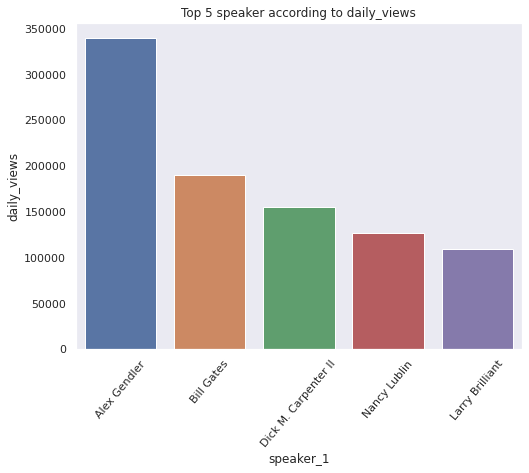

In [ ]:
#top 25 speakers
temp=raw_data.groupby(['speaker_1'],as_index=False)['daily_views'].sum().sort_values('daily_views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1', y='daily_views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.title('Top 5 speaker according to daily_views')
ax.grid(False)

### Speaker Vs Number of talks delivered

In [ ]:
data_speaker_count=pd.DataFrame(raw_data['speaker_1'].value_counts()).reset_index().rename(columns=({'index':'Speaker','speaker_1':'Number of talks'}))

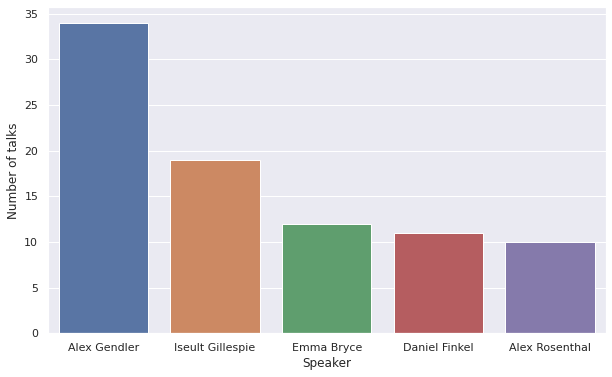

In [ ]:
most_talks = data_speaker_count.nlargest(5, 'Number of talks')
plt.figure(figsize=(10,6))
sns.barplot(x = 'Speaker', y = 'Number of talks', data = most_talks)
plt.show()

### speaker vs duration

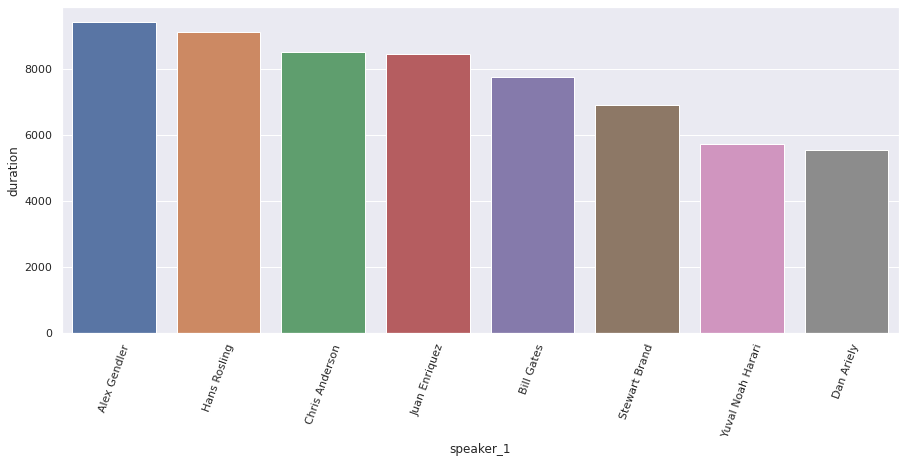

In [ ]:
temp=raw_data.groupby(['speaker_1'],as_index=False)['duration'].sum().sort_values('duration',ascending=False)[:25]
temp=raw_data.groupby(['speaker_1'],as_index=False).agg({'duration':'sum','talk_id':'count'}).sort_values('duration',ascending=False).reset_index()[:8]
temp['talk_id']=temp['duration']/temp['talk_id']
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='duration',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=70);

### Speaker vs comments

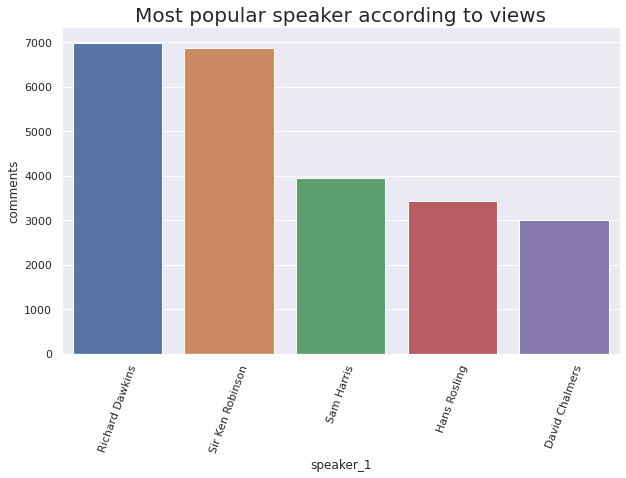

In [ ]:
temp=raw_data.groupby(['speaker_1'],as_index=False)['comments'].sum().sort_values('comments',ascending=False)[:5]
plt.figure(figsize=(10,6))
ax=sns.barplot(x='speaker_1',y='comments',data=temp);
plt.setp(ax.get_xticklabels(), rotation=70);
plt.title('Most popular speaker according to views',fontsize=20)
plt.show()

### Speaker vs Average Views

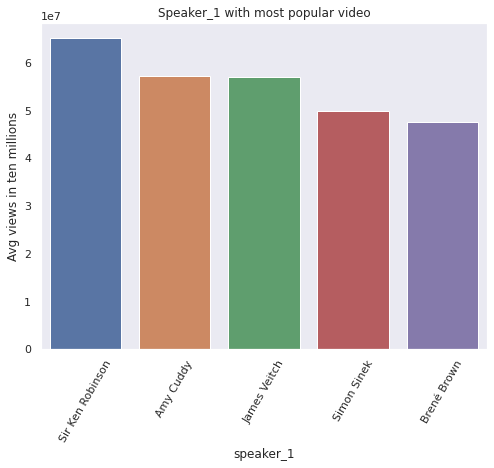

In [ ]:
# Speaker most popular video
temp=raw_data[['speaker_1','views']].sort_values('views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1',y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=60);
plt.title('Speaker_1 with most popular video')
plt.ylabel('Avg views in ten millions')
ax.grid(False)

## **Target Encoding**

### ***Target encoding is the process of replacing a catgorical variable values with the mean of the target (dependent variable) variable***

### Applying Target encoding on speaker_1

In [ ]:
speaker=raw_data.groupby('speaker_1').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
raw_data['speaker_1_avg_views']=raw_data['speaker_1'].map(speaker)

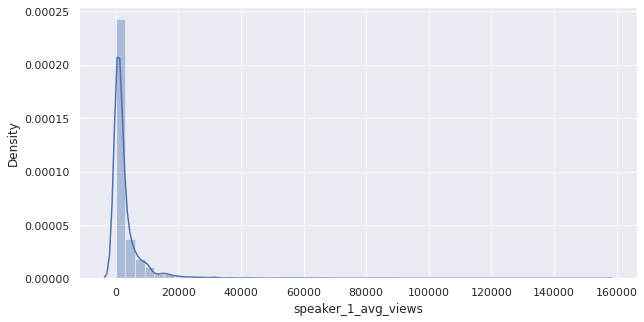

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['speaker_1_avg_views'])
plt.show()

## **Event**

### Event is also a catagorical variable, therefore we also apply target encoding on it. 

In [ ]:
event=raw_data.groupby('event').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
event=event.to_dict()
event=event.values()
event=  list(event)[0]
raw_data['event_wise_avg_views']=raw_data['event'].map(event)

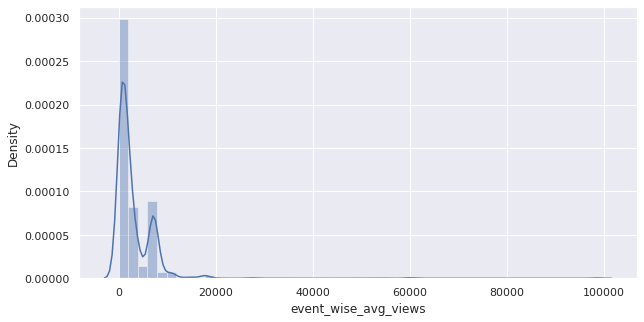

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['event_wise_avg_views'])
plt.show()

## **Top 10 Ted Talk events**

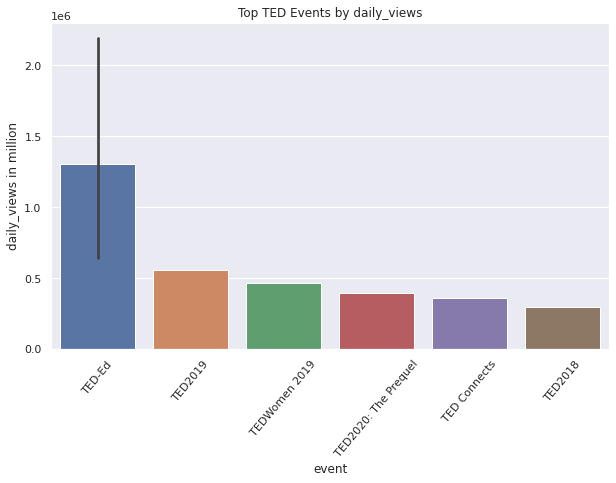

In [ ]:
temp=raw_data.groupby(['event','publish_year'],as_index=False).agg({'daily_views':'sum','talk_id':'count'}).sort_values('daily_views',ascending=False).reset_index()[:8]
temp['talk_id']=temp['daily_views']/temp['talk_id']
plt.figure(figsize=(10,6))
ax=sns.barplot(x='event',y='daily_views',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by daily_views')
plt.ylabel('daily_views in million')
plt.setp(labels, rotation=50);

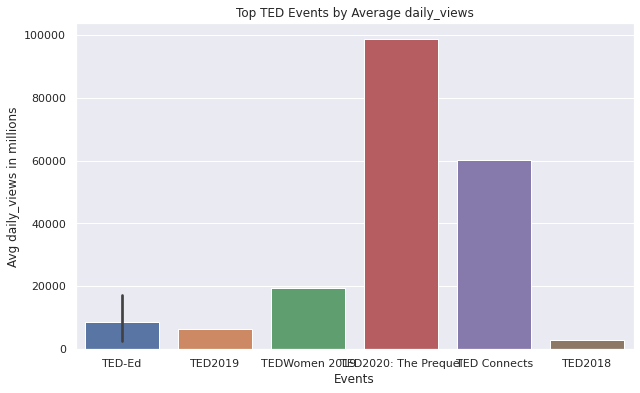

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='event',y='talk_id',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by Average daily_views')
plt.xlabel('Events')
plt.ylabel('Avg daily_views in millions')
plt.show()

#**available_language variable** 



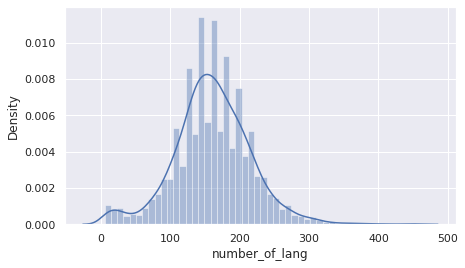

In [ ]:
raw_data['number_of_lang'] = raw_data['available_lang'].apply(lambda x: len(x))
sns.distplot(raw_data['number_of_lang'])
plt.show()

##**Topic variable**

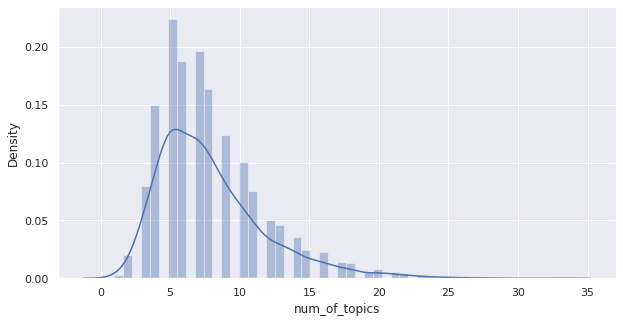

In [ ]:
raw_data['topics'] = raw_data.apply(lambda x: eval(x['topics']), axis=1)
raw_data['num_of_topics'] = raw_data.apply(lambda x: len(x['topics']), axis=1)
# graph:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['num_of_topics'])

###***Unique Topics***

In [ ]:
#Checking for unique topic
unique_topics=[]
for i in range(0,len(raw_data)):
  temp=raw_data['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)
      
len(unique_topics)

457

In [ ]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(raw_data)):
    temp2=raw_data['topics'][i]
    if(topic in temp2):
      temp+=raw_data['daily_views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [ ]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(raw_data)):
  temp=0
  temp_topic=raw_data['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
raw_data['topics_wise_avg_views'] = se.values

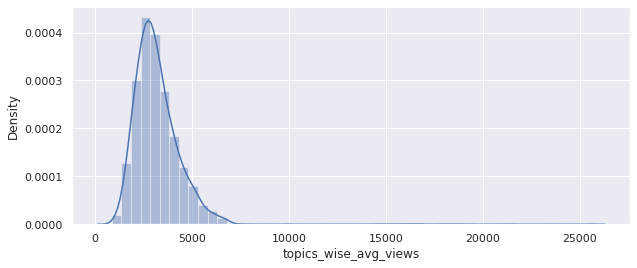

In [ ]:
# Graph:
plt.figure(figsize=(10,4))
sns.distplot(raw_data['topics_wise_avg_views'])

## ***related_talks variable***

In [ ]:
raw_data['related_talks'] = raw_data['related_talks'].apply(lambda x: ast.literal_eval(x))

####**Related talk column contains a dictionary containing information about related videos with talk_id as key and video name as it's value. taking mean of all realated talk videos views**

In [ ]:
#defining a new feature called related_views
raw_data['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in raw_data.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(raw_data)):
      if (raw_data.loc[i,'talk_id']) in id_list:
        temp+=raw_data.loc[i,'daily_views']

    raw_data.loc[index,'related_views']=temp//6

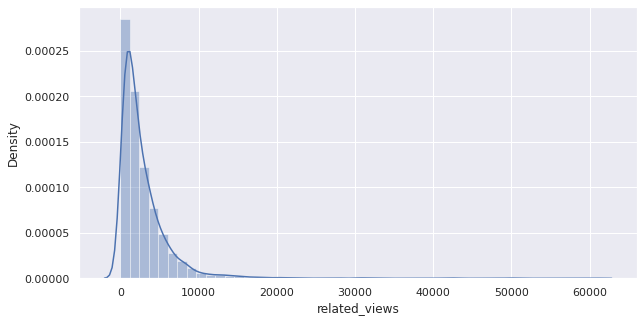

In [ ]:
#Graph of related_views column
plt.figure(figsize=(10,5))
sns.distplot(raw_data['related_views'])
plt.show()

##***Feature Engineering and Data Preprocessing***

In [ ]:
# removing outliers for views
q=data['views'].quantile(0.99)
data_1=data[data['views']<q]

In [ ]:
# removing outliers for comments
q=data_1['comments'].quantile(0.99)
data_2=data_1[data_1['comments']<q]

In [ ]:
# removing outliers for duration
q=data_2['duration'].quantile(0.99)
data_3=data_2[data_2['duration']<q]

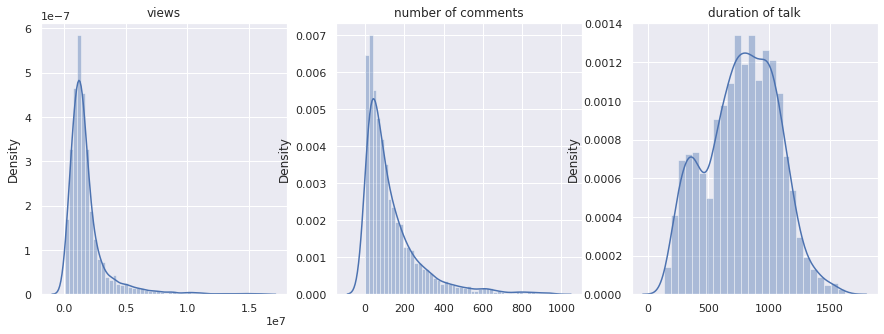

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("views")
sns.distplot(x= data_3['views'])

plt.subplot(1,3,2)
plt.title("number of comments")
sns.distplot(x= data_3['comments'])

plt.subplot(1,3,3)
plt.title("duration of talk")
sns.distplot(x= data_3['duration'])

plt.show()

In [ ]:
data_3['log_views']=np.log(data_3['views'])
data_3['log_comments']=np.log(data_3['comments'])
data_3['log_duration']=np.log(data_3['duration'])

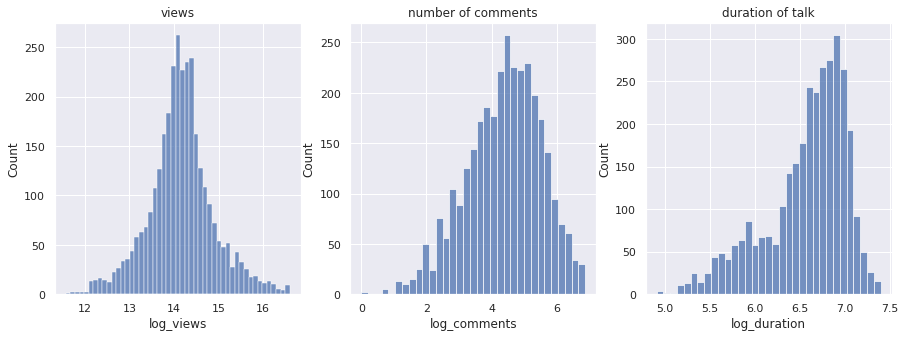

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("views")
sns.histplot(x= data_3['log_views'])

plt.subplot(1,3,2)
plt.title("number of comments")
sns.histplot(x= data_3['log_comments'])

plt.subplot(1,3,3)
plt.title("duration of talk")
sns.histplot(x= data_3['log_duration'])

plt.show()

In [ ]:
data_3.describe(include='all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,time_passed_since_published,publish_month,publish_year,publish_day,publish_week_day,daily_views,related_views,log_views,log_comments,log_duration
count,3237.000000,3237,3237,3237,3237,3237,3.237000e+03,3237,3237,3237,...,3237,3237,3237.000000,3237.000000,3237,3237.000000,3237.0,3237.000000,3237.000000,3237.000000
unique,NaN,3237,2774,2799,1951,2801,NaN,851,2856,418,...,NaN,12,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
top,NaN,Averting the climate crisis,Hans Rosling,{0: 'Hans Rosling'},{0: ['writer']},{0: 'Juan Enriquez thinks and writes about the...,NaN,2018-04-10 00:00:00,2007-04-05 00:00:00,TED2018,...,NaN,Apr,NaN,NaN,Tue,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,10,9,48,9,NaN,95,19,95,...,NaN,313,NaN,NaN,713,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984-02-02 00:00:00,2006-06-27 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-22 00:00:00,2020-04-28 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8956.287921,NaN,NaN,NaN,NaN,NaN,1.875494e+06,NaN,NaN,NaN,...,2194 days 17:24:58.053753440,NaN,2013.833179,15.448563,NaN,2440.416013,0.0,14.159557,-inf,6.565184
std,15703.555393,NaN,NaN,NaN,NaN,NaN,1.804008e+06,NaN,NaN,NaN,...,1392 days 02:35:17.333954720,NaN,3.828118,8.606970,NaN,10775.529098,0.0,0.733284,NaN,0.457655
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.065450e+05,NaN,NaN,NaN,...,0 days 00:00:00,NaN,2006.000000,1.000000,NaN,35.198216,0.0,11.576323,-inf,4.905275
25%,1103.000000,NaN,NaN,NaN,NaN,NaN,9.533950e+05,NaN,NaN,NaN,...,908 days 00:00:00,NaN,2011.000000,8.000000,NaN,373.552928,0.0,13.767785,3.610918,6.345636


In [ ]:
data_3['all_speakers']

0                                    {0: 'Al Gore'}
1                               {0: 'Hans Rosling'}
2                                {0: 'David Pogue'}
3                              {0: 'Majora Carter'}
5                        {0: 'Joshua Prince-Ramus'}
                           ...                     
3994                       {0: 'Tom Rivett-Carnac'}
3995                          {0: 'Oliver Jeffers'}
3999    {0: 'Larry Brilliant', 1: 'Chris Anderson'}
4000                            {0: 'Nancy Lublin'}
4002                    {0: 'Dick M. Carpenter II'}
Name: all_speakers, Length: 3237, dtype: object

In [ ]:
data_3['occupations']

0                               {0: ['climate advocate']}
1           {0: ['global health expert; data visionary']}
2                           {0: ['technology columnist']}
3             {0: ['activist for environmental justice']}
5                                      {0: ['architect']}
                              ...                        
3994                        {0: ['political strategist']}
3995                       {0: ['artist', 'storyteller']}
3999    {0: ['epidemiologist', 'philanthropist'], 1: [...
4000                             {0: ['health activist']}
4002                              {0: ['law researcher']}
Name: occupations, Length: 3237, dtype: object

In [ ]:
# Extracting all occupations
import ast
list_of_occupations=[]
for ele in data_3['occupations'].iteritems():
  for occ in ele:
    if type(occ)!=int:
        val=ast.literal_eval(occ)
        for key in val: 
          list_of_occupations.append(val[key])
list_of_occupations=[ele for list_ in list_of_occupations for ele in list_]

In [ ]:
len(list_of_occupations)

4214

In [ ]:
pd.Series(list_of_occupations).value_counts()

author                             145
writer                             128
entrepreneur                        99
artist                              87
activist                            76
                                  ... 
yo-yo champion                       1
neuroscientist and psychiatrist      1
science historian                    1
know-it-all                          1
law researcher                       1
Length: 1711, dtype: int64

In [ ]:
data_3['about_speakers']

0       {0: 'Nobel Laureate Al Gore focused the world’...
1       {0: 'In Hans Rosling’s hands, data sings. Glob...
2       {0: 'David Pogue is the personal technology co...
3       {0: 'Majora Carter redefined the field of envi...
5       {0: 'Joshua Prince-Ramus is best known as arch...
                              ...                        
3994    {0: 'A political strategist focused on creatin...
3995    {0: 'With a style that crackles with wry wit, ...
3999    {0: "TED Prize winner Larry Brilliant has spen...
4000    {0: 'Nancy Lublin, cofounder and CEO of Crisis...
4002    {0: 'Dick M. Carpenter II studies cutting edge...
Name: about_speakers, Length: 3237, dtype: object